In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from print_result import print_result
import pandas as pd

In [2]:
MODELS = [
    {
        'model_name':"cardiffnlp/twitter-roberta-large-2022-154m",
        'model_path':"./cardiffnlp/twitter-roberta-large-2022-154m"
    },
    {
        'model_name': 'roberta-large',
        'model_path': './roberta-large'
    },
    {
        'model_name': 'google/electra-large-discriminator',
        'model_path': './google/electra-large-discriminator'
    },
    {
        'model_name':'tner/bertweet-large-tweetner7-all',
        'model_path':'./tner/bertweet-large-tweetner7-all'
    },
    {
        'model_name':'tner/roberta-large-tweetner7-all',
        'model_path':'./tner/roberta-large-tweetner7-all'
    }
]

test_df = pd.read_csv('../data/finetune_train_val_test/test.csv')
def concatenate_texts(df, tokenizer_sep):
    grouped_df = df.groupby('twitter user id')['texts'].apply(f' {tokenizer_sep} '.join).reset_index()
    merged_df = pd.merge(grouped_df, df.drop(columns=['texts']), on='twitter user id', how='left')
    merged_df.drop_duplicates(subset=['twitter user id'], inplace=True)
    return merged_df

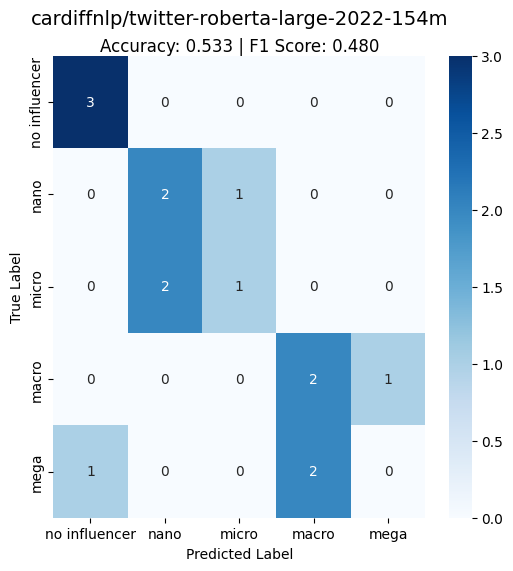

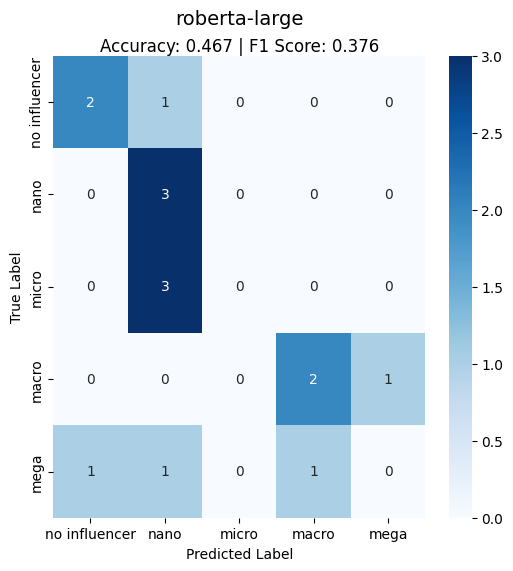

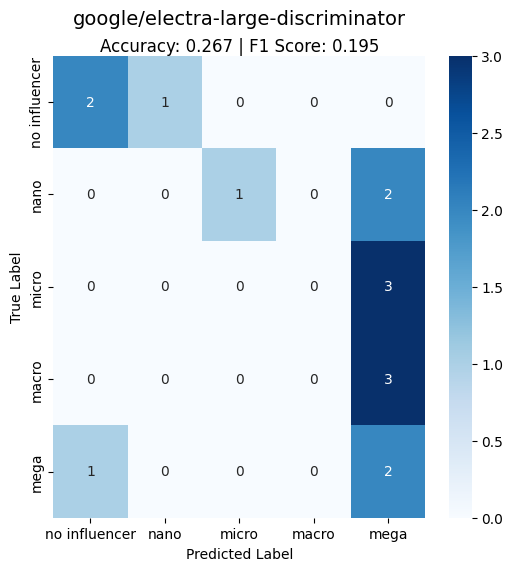

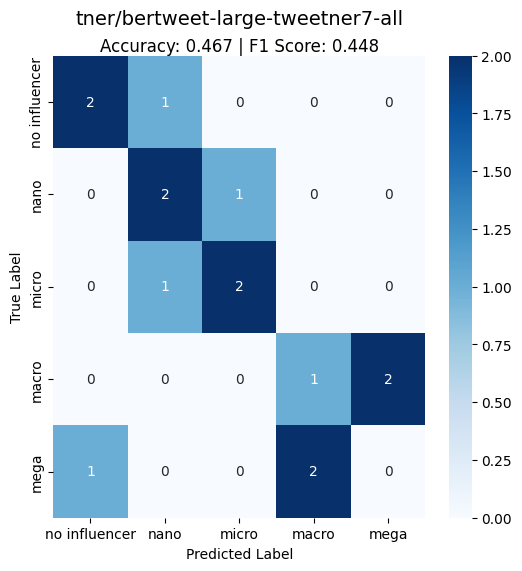

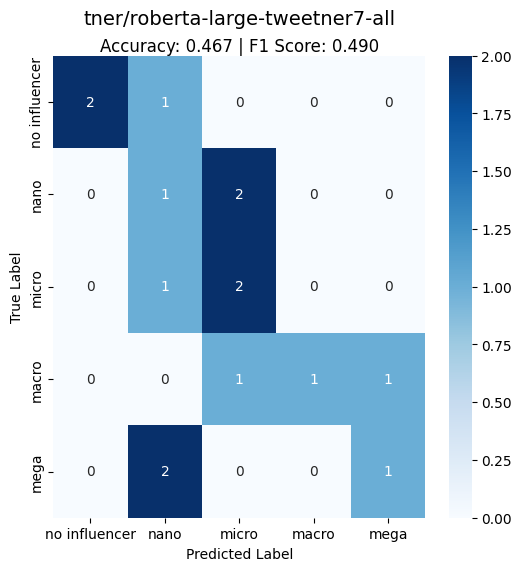

In [3]:
for d in MODELS:
    model_path = d['model_path']
    model_name = d['model_name']
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)

    result = concatenate_texts(test_df, tokenizer.sep_token)
    print_result(result, model, model_name, tokenizer)